# Handling Chest X-ray images

# Colab setting and google drive mount

▶ Preparation 

0. 개인 google drive 에 "Data" 라는 폴더를 생성해주세요.

1. 공유 폴더 안에 X-ray.zip 파일을 다운로드 받아 압축을 푼 뒤 생성되는 "X-ray" 폴더를 google drive 의 "Data" 폴더 안에 업로드해 주세요.

2. "X-ray" 폴더 내로 들어가서 intro_cxr_datasets.ipynb 파일을 colab 으로 열어주세요. (우클릭 후, 연결앱을 colab 으로 설정)

3. 혹시 drive mount 가 잘 되지 않을 경우, code 와 data 를 개인 컴퓨터에 저장해서 jupyter notebook 으로 실행시키셔도 됩니다.

In [1]:
#mount google drive to read data
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
%cd '/content/drive/My Drive/Data/X-ray'

/content/drive/My Drive/Data/X-ray


In [5]:
!ls

CheXpert-v1.0-small  img		       MIMIC-CXR  RSNA_Pneumonia
handling_cxr.ipynb   intro_cxr_datasets.ipynb  NIH	  vin


In [6]:
#@title
!ls

CheXpert-v1.0-small  img		       MIMIC-CXR  RSNA_Pneumonia
handling_cxr.ipynb   intro_cxr_datasets.ipynb  NIH	  vin


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import cv2
from skimage import exposure

import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [4]:
def dicom2array(path, voi_lut=True, fix_monochrome=True):
    dicom = pydicom.read_file(path)
    # VOI LUT (if available by DICOM device) is used to
    # transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data

def plot_img(img, size=(7, 7), is_rgb=True, title="", cmap='gray'):
    plt.figure(figsize=size)
    plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()
    
def plot_imgs(imgs, cols=4, size=7, is_rgb=True, title="", cmap='gray', img_size=(500,500)):
    rows = len(imgs)//cols + 1
    fig = plt.figure(figsize=(cols*size, rows*size))
    for i, img in enumerate(imgs):
        if img_size is not None:
            img = cv2.resize(img, img_size)
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()

In [5]:
dataset_dir = './vin'
dicom_paths = sorted(glob(f'{dataset_dir}/*.dicom'))

In [6]:
dicom_paths

['./vin/1f121cde3f77c6093fde0bdf32ae1ff3.dicom',
 './vin/2f1fe9e5505c9e66d781ffc8b9a666da.dicom',
 './vin/82036dda6c748f81f73d4b597ed7f355.dicom',
 './vin/d7ab4fc8eba9859ab9199138002d6f34.dicom']

In [7]:
def dicom2array(path, voi_lut=True, fix_monochrome=True):
    dicom = pydicom.read_file(path)
    # VOI LUT (if available by DICOM device) is used to
    # transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data

def plot_img(img, size=(7, 7), is_rgb=True, title="", cmap='gray'):
    plt.figure(figsize=size)
    plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()
    
def plot_imgs(imgs, cols=4, size=7, is_rgb=True, title="", cmap='gray', img_size=(500,500)):
    rows = len(imgs)//cols + 1
    fig = plt.figure(figsize=(cols*size, rows*size))
    for i, img in enumerate(imgs):
        if img_size is not None:
            img = cv2.resize(img, img_size)
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()

/usr/local/lib/python3.6/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "


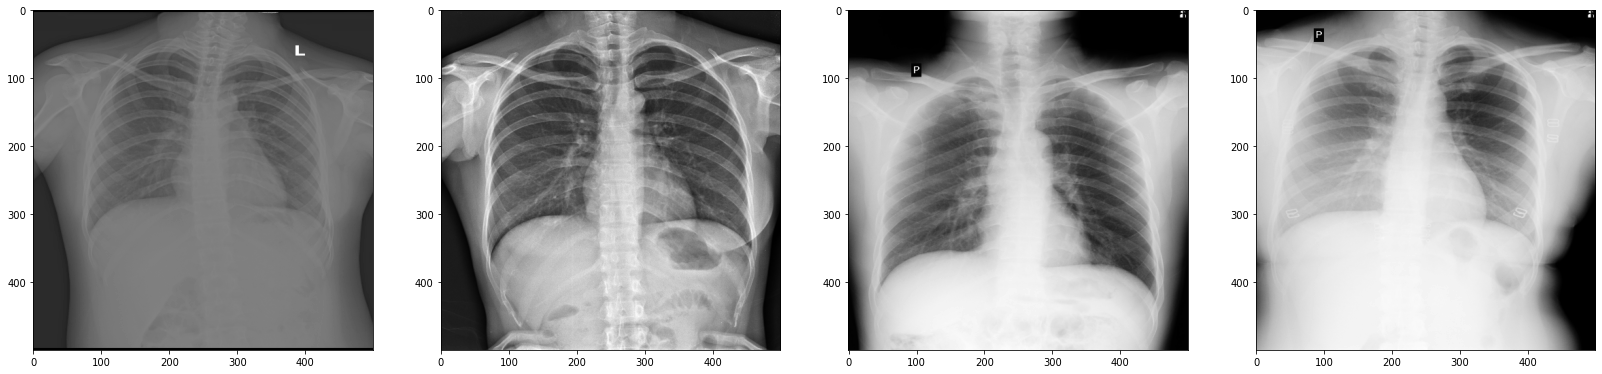

In [8]:
imgs2 = [dicom2array(path, voi_lut=False) for path in dicom_paths[:4]]
plot_imgs(imgs2)

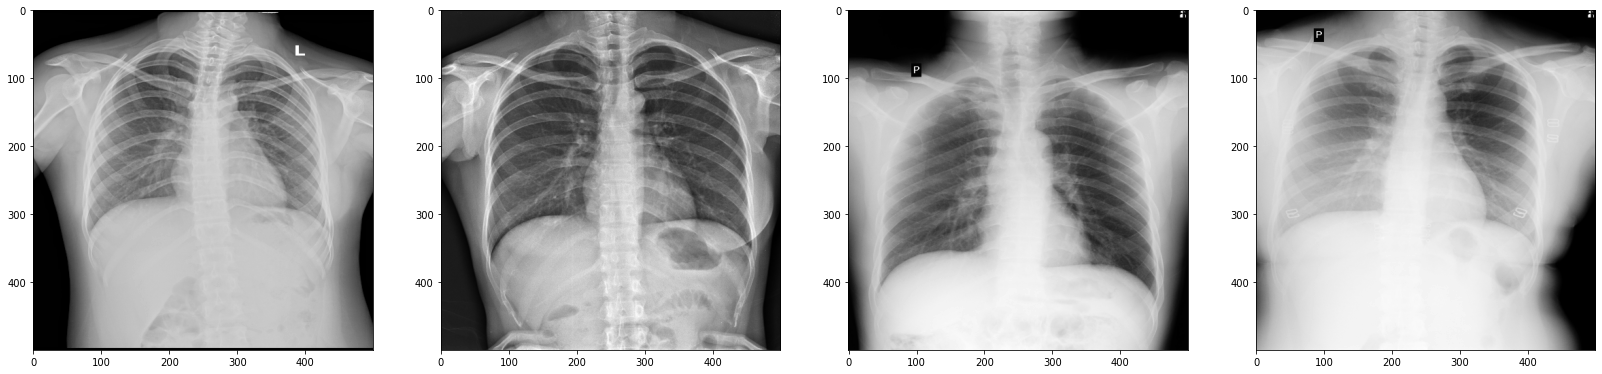

In [9]:
imgs1 = [dicom2array(path) for path in dicom_paths[:4]]
plot_imgs(imgs1)

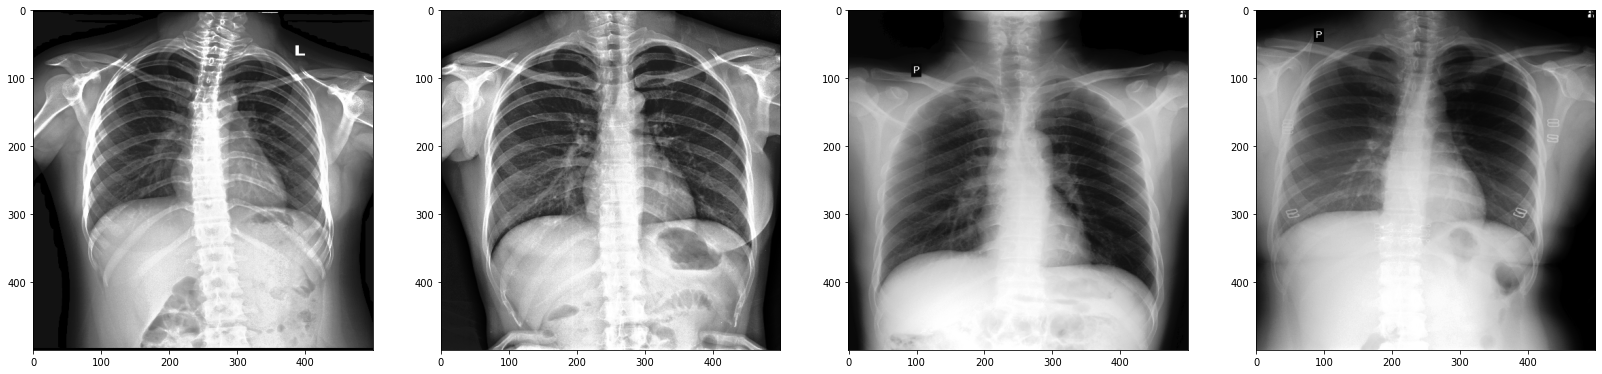

In [10]:
imgs3 = [exposure.equalize_hist(img) for img in imgs1]
plot_imgs(imgs3)

In [11]:
def hist_plot(imgs):
    #color template
    #https://matplotlib.org/3.1.0/gallery/color/named_colors.html

    plt.figure(figsize=(25, 5))

    plt.subplot(141)#(rows, columns, order)
    n, bins, patches = plt.hist(x=imgs[0].squeeze().flatten(), bins=256, color='deeppink', alpha=0.7, rwidth=0.7)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('pixel value')
    plt.ylabel('number of pixels')
    plt.title('ix1 histogram')
    maxfreq=n.max()
    plt.ylim(ymax=np.ceil(maxfreq) / 10 * 10 if maxfreq % 10 else maxfreq + 10)

    plt.subplot(142)
    n1, bins, patches = plt.hist(x=imgs[1].squeeze().flatten(), bins=256, color='darkorange', alpha=0.7, rwidth=0.7)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('pixel value')
    plt.ylabel('number of pixels')
    plt.title('ix2 histogram')
    maxfreq=n1.max()
    plt.ylim(ymax=np.ceil(maxfreq) / 10 * 10 if maxfreq % 10 else maxfreq + 10)

    plt.subplot(143)
    n, bins, patches = plt.hist(x=imgs[2].squeeze().flatten(), bins=256, color='aqua', alpha=0.7, rwidth=0.7)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('pixel value')
    plt.ylabel('number of pixels')
    plt.title('ix3 histogram')
    maxfreq=n.max()
    plt.ylim(ymax=np.ceil(maxfreq) / 10 * 10 if maxfreq % 10 else maxfreq + 10)

    plt.subplot(144)
    n, bins, patches = plt.hist(x=imgs[3].squeeze().flatten(), bins=256, color='green', alpha=0.7, rwidth=0.7)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('pixel value')
    plt.ylabel('number of pixels')
    plt.title('ix4 histogram')
    maxfreq=n.max()
    plt.ylim(ymax=np.ceil(maxfreq) / 10 * 10 if maxfreq % 10 else maxfreq + 10)

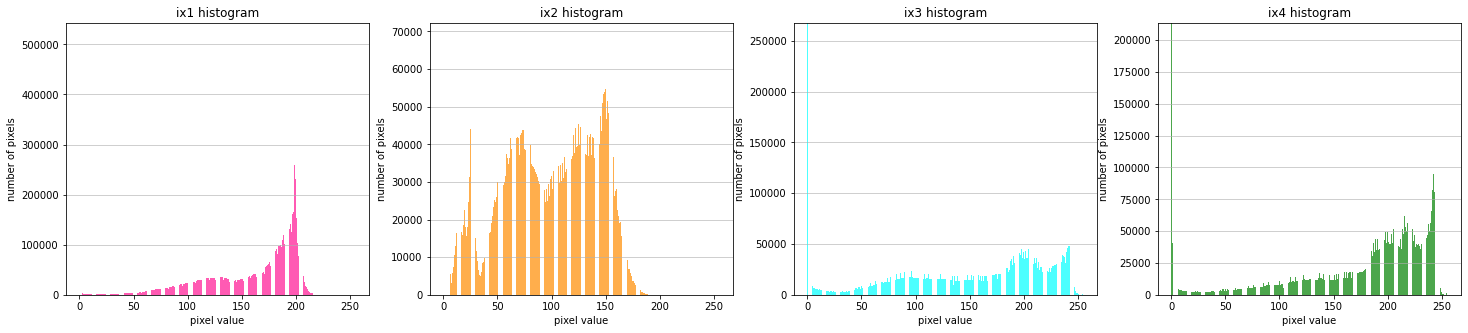

In [12]:
hist_plot(imgs1)

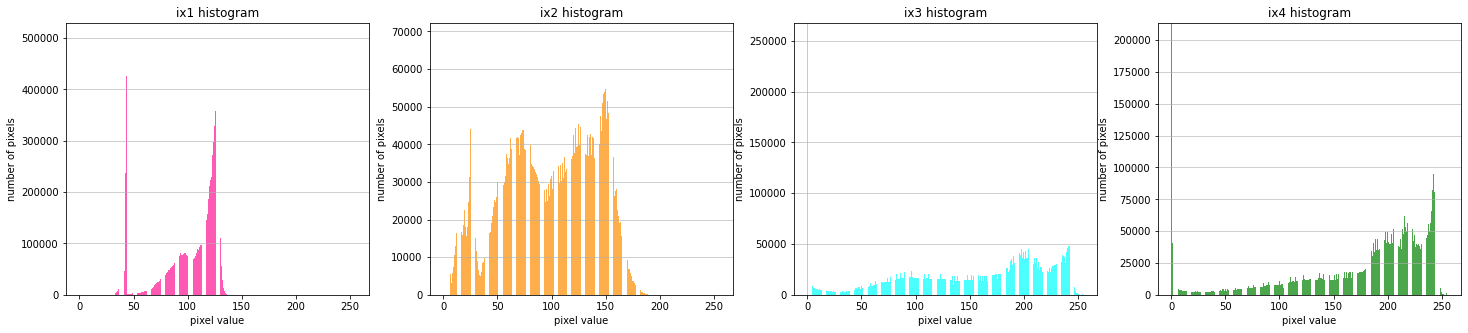

In [13]:
hist_plot(imgs2)

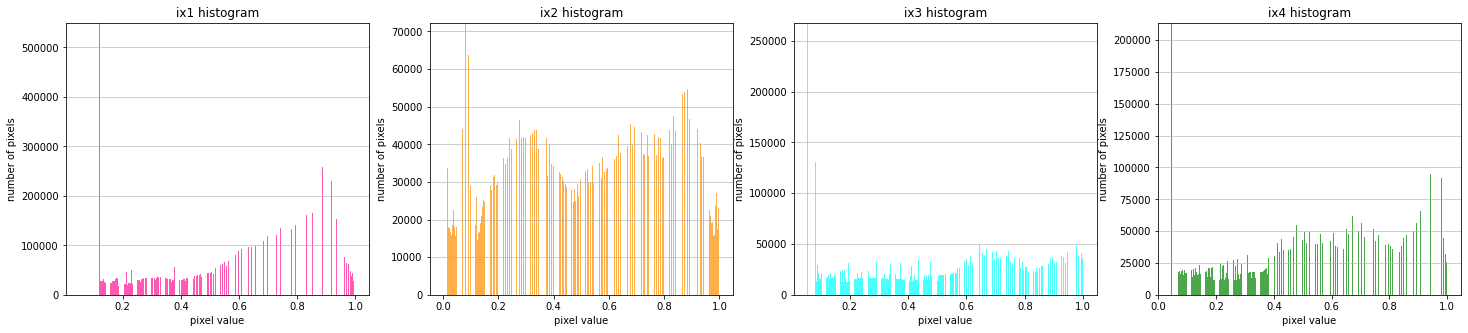

In [14]:
hist_plot(imgs3)

In [15]:
from skimage.transform import match_histograms

def histogram_equalization(image_before_match, reference_image):

    equalized_image = match_histograms(image_before_match, reference_image, multichannel=False)
    ##If the images have multiple channels, the matching is done independently for each channel,
    ##as long as the number of channels is equal in the input image and the reference.

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                        sharex=True, sharey=True)
    
    
    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    ax1.imshow(image_before_match, cmap='gray')
    ax1.set_title('Source')
    ax2.imshow(reference_image, cmap='gray')
    ax2.set_title('Reference')
    ax3.imshow(equalized_image, cmap='gray')
    ax3.set_title('Matched')

    plt.tight_layout()
    plt.show()
    return equalized_image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: DEPRECATED: skimage.transform.match_histograms has been moved to skimage.exposure.match_histograms. It will be removed from skimage.transform in version 0.18.
  """


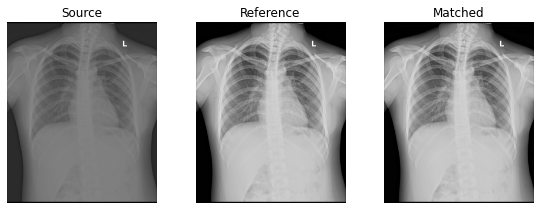

In [16]:
equalized_image_ix1=histogram_equalization(imgs2[0], imgs1[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: DEPRECATED: skimage.transform.match_histograms has been moved to skimage.exposure.match_histograms. It will be removed from skimage.transform in version 0.18.
  """


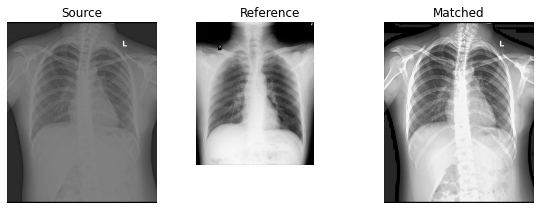

In [18]:
equalized_image_ix1=histogram_equalization(imgs2[0], imgs1[2])

In [20]:
# Min-Max normalization

def histogram_stretching(image_before_match, stretching_normvalue):

  
    stretched_image = ( (image_before_match - image_before_match.min()) / (image_before_match.max() - image_before_match.min()) ) * stretching_normvalue
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                                        sharex=True, sharey=True)
    
    for aa in (ax1, ax2):
        aa.set_axis_off()

    ax1.imshow(image_before_match.squeeze(), cmap='gray')
    ax1.set_title('Source')
    ax2.imshow(stretched_image.squeeze(), cmap='gray')
    ax2.set_title('Image after match')
    
    plt.tight_layout()
    plt.show()
    return stretched_image

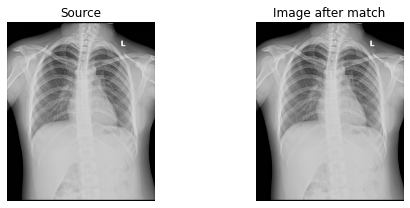

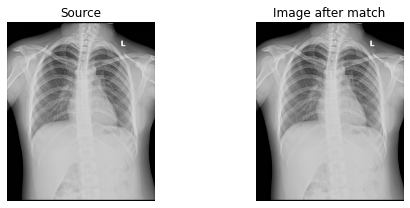

In [21]:
stretched_image_ix1 = histogram_stretching(imgs1[0], 255)
stretched_image_ix2 = histogram_stretching(imgs1[0], 100)

In [22]:
from PIL import Image

In [23]:
ix1 = Image.fromarray(stretched_image_ix1)
ix1 = ix1.resize((256, 256))
ix1 = ix1.convert("L")

ix2 = Image.fromarray(stretched_image_ix2)
ix2 = ix2.resize((256, 256))
ix2 = ix2.convert("L")

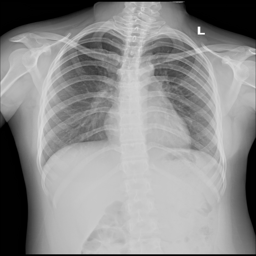

In [24]:
ix1

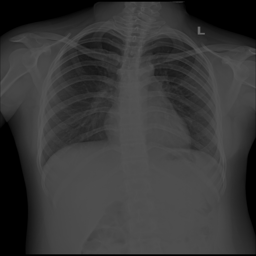

In [25]:
ix2